In [125]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

df = pd.read_csv("anzdata.csv")
df


,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
5,posted,NaN,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NaN,NaN,Robert,...,20,NaN,NaN,2018-08-01T02:00:00.000+0000,163.00,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,NaN,debit
6,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,SALES-POS,3aa18033-a0a9-4190-a117-b7caaf4d07e3,NaN,Kristin,...,43,Kalkallo,VIC,2018-08-01T02:23:04.000+0000,61.06,b79ca208099c4c28aa5dae966096d842,Australia,CUS-4123612273,144.95 -37.53,debit
7,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,POS,ee58145d-26e8-4b01-9cd9-62378014f21d,NaN,Kristin,...,43,Melbourne,VIC,2018-08-01T04:11:25.000+0000,15.61,e1c4a50d6a0549cbb3710a62a2fa00d5,Australia,CUS-4123612273,144.96 -37.81,debit
8,authorized,1.0,NaN,ACC-182446574,AUD,116.06 -32.00,POS,cfbf535e-caa8-499f-9d41-bbdc2b836d85,NaN,Tonya,...,27,Yokine,WA,2018-08-01T04:40:00.000+0000,19.25,799e39eb2c1b411185424b0f2cd18bda,Australia,CUS-3026014945,115.85 -31.9,debit
9,posted,NaN,NaN,ACC-602667573,AUD,151.23 -33.96,INTER BANK,NaN,NaN,Michael,...,40,NaN,NaN,2018-08-01T06:00:00.000+0000,21.00,798a77869014441b840a7a8a23408332,Australia,CUS-2031327464,NaN,debit


In [126]:
print (len(df[df['customer_id'] == 'CUS-2142601169']))

303


In [127]:
df_salaries = df[df["txn_description"]=="PAY/SALARY"].groupby("customer_id")
df_salaries.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
50,posted,NaN,0,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,NaN,0.0,Isaiah,...,23,NaN,NaN,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,NaN,credit
61,posted,NaN,0,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,NaN,0.0,Marissa,...,23,NaN,NaN,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,CUS-2500783281,NaN,credit
64,posted,NaN,0,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,NaN,0.0,Eric,...,22,NaN,NaN,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,Australia,CUS-326006476,NaN,credit
68,posted,NaN,0,ACC-3541460373,AUD,145.00 -37.83,PAY/SALARY,NaN,0.0,Jeffrey,...,24,NaN,NaN,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,CUS-1433879684,NaN,credit
70,posted,NaN,0,ACC-2776252858,AUD,144.95 -37.76,PAY/SALARY,NaN,0.0,Kristin,...,43,NaN,NaN,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,Australia,CUS-4123612273,NaN,credit
72,posted,NaN,0,ACC-1598451071,AUD,153.41 -27.95,PAY/SALARY,NaN,0.0,Diana,...,26,NaN,NaN,2018-08-01T14:00:00.000+0000,1013.67,a72c9dd8b4614a1982ff71f8b62677ad,Australia,CUS-2487424745,NaN,credit
90,posted,NaN,0,ACC-3485804958,AUD,138.52 -35.01,PAY/SALARY,NaN,0.0,Jessica,...,34,NaN,NaN,2018-08-01T16:00:00.000+0000,3903.73,cf378669537f46e4acee7321fa8accb1,Australia,CUS-1196156254,NaN,credit
92,posted,NaN,0,ACC-1973887809,AUD,115.78 -31.90,PAY/SALARY,NaN,0.0,Antonio,...,26,NaN,NaN,2018-08-01T16:00:00.000+0000,1098.91,00e97a9be9654405bb44f96e748b3ace,Australia,CUS-1646621553,NaN,credit
93,posted,NaN,0,ACC-4059612845,AUD,130.98 -12.49,PAY/SALARY,NaN,0.0,Jonathan,...,38,NaN,NaN,2018-08-01T16:00:00.000+0000,2647.38,794ef124f66645e68d0707ef0a544b50,Australia,CUS-495599312,NaN,credit
97,posted,NaN,0,ACC-819621312,AUD,145.04 -37.85,PAY/SALARY,NaN,0.0,Michele,...,30,NaN,NaN,2018-08-01T17:00:00.000+0000,1158.15,148a346f380948cfa1ee8e5166b56a6e,Australia,CUS-1271030853,NaN,credit


In [128]:
print (len(df[df['customer_id']=='CUS-2142601169']))

303


In [129]:
df_salaries = df[df["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean()
df_salaries

,card_present_flag,merchant_code,balance,age,amount
customer_id,,,,,
CUS-1005756958,NaN,0.0,4718.665385,53,970.47
CUS-1117979751,NaN,0.0,11957.202857,21,3578.65
CUS-1140341822,NaN,0.0,5841.720000,28,1916.51
CUS-1147642491,NaN,0.0,8813.467692,34,1711.39
CUS-1196156254,NaN,0.0,23845.717143,34,3903.73
CUS-1220154422,NaN,0.0,9225.907143,25,2282.36
CUS-1233833708,NaN,0.0,5265.287500,44,596.33
CUS-1271030853,NaN,0.0,5102.585714,30,1158.15
CUS-127297539,NaN,0.0,5899.080769,20,1138.79


In [130]:
df.txn_description.unique()

array(['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY',
       'PHONE BANK'], dtype=object)

In [131]:
salaries = []

for customer_id in df["customer_id"]:
    salaries.append(int(df_salaries.loc[customer_id]["amount"]))
    
df["annual_salary"] = salaries

In [220]:
df_cus = df.groupby("customer_id").mean()
df_cus

,card_present_flag,merchant_code,balance,age,amount,annual_salary
customer_id,,,,,,
CUS-1005756958,0.812500,0.0,2275.852055,53,222.862603,970
CUS-1117979751,0.826923,0.0,9829.929000,21,339.843700,3578
CUS-1140341822,0.815385,0.0,5699.212250,28,212.632500,1916
CUS-1147642491,0.750000,0.0,9032.841186,34,245.600169,1711
CUS-1196156254,0.785276,0.0,22272.433755,34,147.145796,3903
CUS-1220154422,0.750000,0.0,8475.796000,25,274.614800,2282
CUS-1233833708,0.760000,0.0,4923.853636,44,236.035000,596
CUS-1271030853,0.861538,0.0,5003.940513,30,248.545128,1158
CUS-127297539,0.824675,0.0,5448.334573,20,109.833216,1138


In [221]:

N_train = int(len(df_cus)*0.8)
X_train = df_cus.drop("annual_salary", axis=1).iloc[:N_train]
Y_train = df_cus["annual_salary"].iloc[:N_train]
X_test = df_cus.drop("annual_salary", axis=1).iloc[N_train:]
Y_test = df_cus["annual_salary"].iloc[N_train:]

In [222]:
Y_test.shape

(20,)

In [223]:
linear_reg = LinearRegression()

linear_reg.fit(X_train, Y_train)
linear_reg.score(X_train, Y_train)

0.23295376366257825

In [224]:
y_pred = linear_reg.predict(X_test)
y_pred


array([1993.98473311, 2867.39066481, 1944.95959591, 1806.85984885,
       2226.35045442, 2075.34697175, 1813.02987337, 5388.67435983,
       1902.35351608, 2191.90445145, 1713.48134178, 2854.40519949,
       2094.77781158, 3815.34342881, 2249.92922822, 1768.80816189,
       2095.02988288, 1515.18425875, 1782.72752537, 2481.2898546 ])

In [225]:
linear_reg.score(X_test, Y_test)


-0.3169423498074737

In [226]:
Y_test = np.asarray(Y_test)
Y_test.shape

(20,)

In [227]:
y_pred = y_pred.astype(int)
y_pred.shape

(20,)

In [228]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.0


In [229]:
df_cat = df[["txn_description", "gender", "age", "merchant_state", "movement","amount","balance"]]
df_dum= pd.get_dummies(df_cat)
df_dum.head()

,age,amount,balance,txn_description_INTER BANK,txn_description_PAY/SALARY,txn_description_PAYMENT,txn_description_PHONE BANK,txn_description_POS,txn_description_SALES-POS,gender_F,...,merchant_state_ACT,merchant_state_NSW,merchant_state_NT,merchant_state_QLD,merchant_state_SA,merchant_state_TAS,merchant_state_VIC,merchant_state_WA,movement_credit,movement_debit
0,26,16.25,35.39,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
1,26,14.19,21.20,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,1
2,38,6.42,5.71,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,40,40.90,2117.22,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
4,26,3.25,17.95,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,1


In [253]:
N_train1 = int(len(df)*0.8)
X_train1 = df_dum.iloc[:N_train1]
Y_train1 = df["annual_salary"].iloc[:N_train1]
X_test1 = df_dum.iloc[N_train1:]
Y_test1 = df["annual_salary"].iloc[N_train1:]

In [255]:
print(X_train1.shape)
print(Y_train1.shape)
print(X_test1.shape)
print(Y_test1.shape)

(9634, 21)
(9634,)
(2409, 21)
(2409,)


In [256]:
decision_tree_class = DecisionTreeClassifier()
decision_tree_class.fit(X_train1, Y_train1)
decision_tree_class.score(X_train1, Y_train1)

1.0

In [258]:
Y_pred1 = decision_tree_class.predict(X_test1)


In [259]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test1, Y_pred1))


Accuracy: 0.8298048982980489


In [260]:
df_cat.head()

,txn_description,gender,age,merchant_state,movement,amount,balance
0,POS,F,26,QLD,debit,16.25,35.39
1,SALES-POS,F,26,NSW,debit,14.19,21.20
2,POS,M,38,NSW,debit,6.42,5.71
3,SALES-POS,F,40,QLD,debit,40.90,2117.22
4,SALES-POS,F,26,QLD,debit,3.25,17.95


In [261]:
df_cat.isnull().sum()

txn_description       0
gender                0
age                   0
merchant_state     4326
movement              0
amount                0
balance               0
dtype: int64

In [262]:
obj_df = df_cat.select_dtypes(include=['object']).copy()
obj_df.head()

,txn_description,gender,merchant_state,movement
0,POS,F,QLD,debit
1,SALES-POS,F,NSW,debit
2,POS,M,NSW,debit
3,SALES-POS,F,QLD,debit
4,SALES-POS,F,QLD,debit


In [263]:
int_df = df_cat.select_dtypes(include=['int64']).copy()
float_df=df_cat.select_dtypes(include=['float64']).copy()
df_int_float = pd.concat([float_df,int_df], axis=1, join_axes=[int_df.index])
df_int_float.head()

,amount,balance,age
0,16.25,35.39,26
1,14.19,21.20,26
2,6.42,5.71,38
3,40.90,2117.22,40
4,3.25,17.95,26


In [264]:
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder

le = preprocessing.LabelEncoder()
le.fit(obj_df["merchant_state"].astype(str))
list(le.classes_)

['ACT', 'NSW', 'NT', 'QLD', 'SA', 'TAS', 'VIC', 'WA', 'nan']

In [265]:
obj_df_trf=obj_df.astype(str).apply(le.fit_transform)

In [266]:
df_final = pd.concat([df_int_float,obj_df_trf], axis=1, join_axes=[df_int_float.index])
df_final.head()

,amount,balance,age,txn_description,gender,merchant_state,movement
0,16.25,35.39,26,4,0,3,1
1,14.19,21.20,26,5,0,1,1
2,6.42,5.71,38,4,1,1,1
3,40.90,2117.22,40,5,0,3,1
4,3.25,17.95,26,5,0,3,1


In [267]:
df_final.shape

(12043, 7)

In [268]:
df_final.isnull().sum()

amount             0
balance            0
age                0
txn_description    0
gender             0
merchant_state     0
movement           0
dtype: int64

In [269]:
N1_train = int(len(df)*0.8)
X1_train = df_final.iloc[:N1_train]
Y1_train = df["annual_salary"].iloc[:N1_train]
X1_test = df_final.iloc[N1_train:]
Y1_test = df["annual_salary"].iloc[N1_train:]

In [270]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X1_train, Y1_train)
y1_pred = regressor.predict(X1_test)

In [271]:
Y1_test = np.asarray(Y1_test)
Y1_test

array([1013, 1043, 4132, ..., 4054, 1043,  996], dtype=int64)

In [272]:
y1_pred = y1_pred.astype(int)
y1_pred

array([1013, 1043, 4132, ..., 3791, 2002, 2204])

In [273]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y1_test, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y1_test, y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y1_test, y1_pred)))

Mean Absolute Error: 492.2150269821503
Mean Squared Error: 642373.5491905354
Root Mean Squared Error: 801.4820953649155


In [276]:
errors = abs(y1_pred - Y1_test)
errors

array([   0,    0,    0, ...,  263,  959, 1208], dtype=int64)

In [277]:
mape = 100 * (errors / Y1_test)

In [278]:
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 69.74 %.


AxesSubplot(0.125,0.125;0.775x0.755)


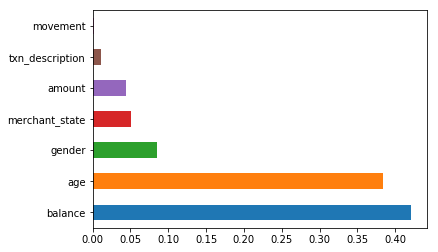

In [279]:
print(pd.Series(regressor.feature_importances_, index=df_final.columns)
   .nlargest(7)
   .plot(kind='barh')) 

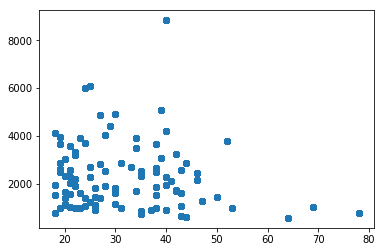

In [281]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df['age'],df['annual_salary'])

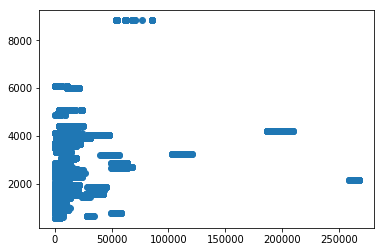

In [282]:
plt.scatter(df['balance'],df['annual_salary'])